In [273]:
library(e1071)
set.seed(1)
x=seq(1:400)
train=sample(1:400,200)

genData = function(w,x,b,noise){
    
    return (((w %*% x) + b + noise*runif(n=length(x),min=-1,max=1))[1,])
    
    #rnorm(mean=0,sd=noise,n=length(x))
}

plotData=function(y,w,x,b,noise){
    plot(x,y)
    abline(b,w,col="green",lty="dashed")
    abline(b+(noise),w,col="blue",lty="dashed")
    abline(b-(noise),w,col="blue",lty="dashed")
}

lmcaller=function(y,x,train){
    df=as.data.frame(cbind(x,y))    
    ytest = y[-train]
    model=lm(y~x,data=df,subset=train)
    yhat=predict(model,newdata=df[-train,])    
    list(coef = model$coef,MSE=MSE(ytest,yhat),yhat=yhat)
}

svrcaller=function(y,x,train){
    df=as.data.frame(cbind(x,y))    
    ytest = y[-train]
    model=svm(y~x,data=df,subset=train)
    yhat=predict(model,newdata=df[-train,])    
    list(MSE=MSE(ytest,yhat),yhat=yhat)
}

tunedSvrCaller=function(y,x,train){
    df=as.data.frame(cbind(x,y))
    ytest = y[-train]
    xtest = x[-train]
    tuner=tune(svm,y~x,data=df[train,],
                  ranges=list(epsilon=seq(0,0.2,0.01),cost=2^(2:5)))
    
    # tuner can be plotted using the plot(tuner) function. But we won't do that now.
    
    tunedModel = tuner$best.model
    yhat=predict(tunedModel,newdata=df[-train,])
    list(MSE=MSE(ytest,yhat),yhat=yhat)
}

MSE=function(y,yhat){
    sqrt(mean((yhat-y)^2))
}

plotCompare=function(x,y,yhat,title){
    plot(x,y,cex=0.5)
    title(title)
    points(x,yhat,cex=0.5,col="red")
}

First create the data. Let's begin by simulating some data that satisfies $$y=w\cdot x + b + \epsilon$$

Where $w=3$ and $b=2$

In [275]:
runRegression=function(y,w,x,b,noise,train){
    
    ytest=y[-train]
    xtest=x[-train]

    lr=lmcaller(y,x,train)
    svr=svrcaller(y,x,train)    
    tsvr=tunedSvrCaller(y,x,train)
    
    results = list(
        MSE=as.vector(cbind(
            LR_MSE=lr$MSE,
            SVR_MSE=svr$MSE,
            TSVR_MSE=tsvr$MSE
        )),
        LM_COEF=lr$coef
    )
    
    minMSE = which.min(results$MSE)
    
    par(mfrow=c(2,2))
    plotData(y,w,x,b,noise)
    barplot(results$MSE,
        col=ifelse(1:3 == minMSE,"green","red"),
        names=c("LM","SVR","Tuned SVR")
    )
    
}

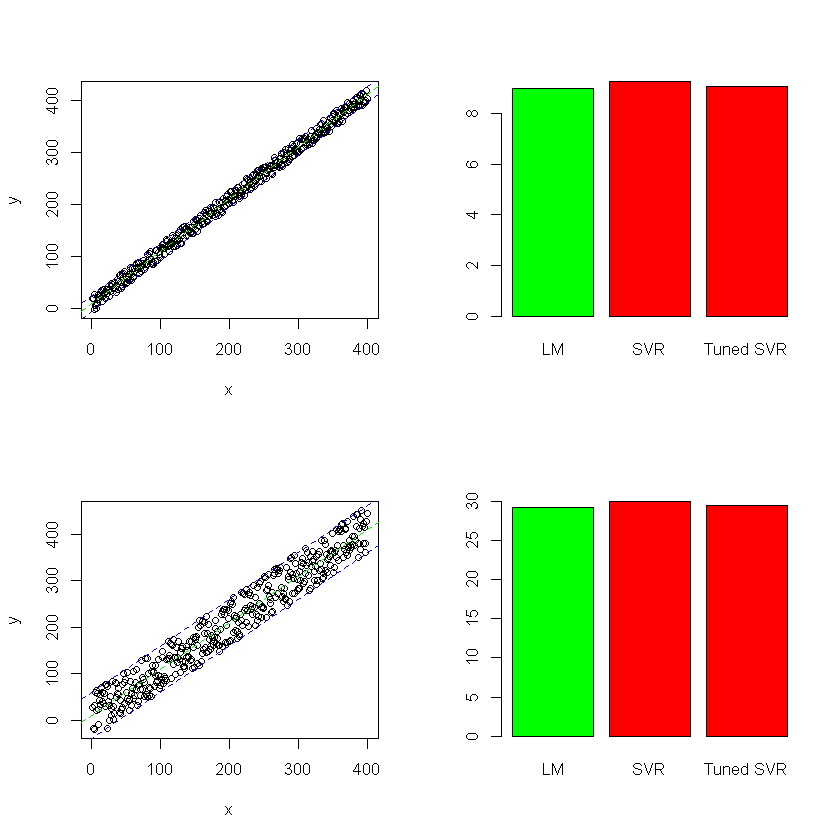

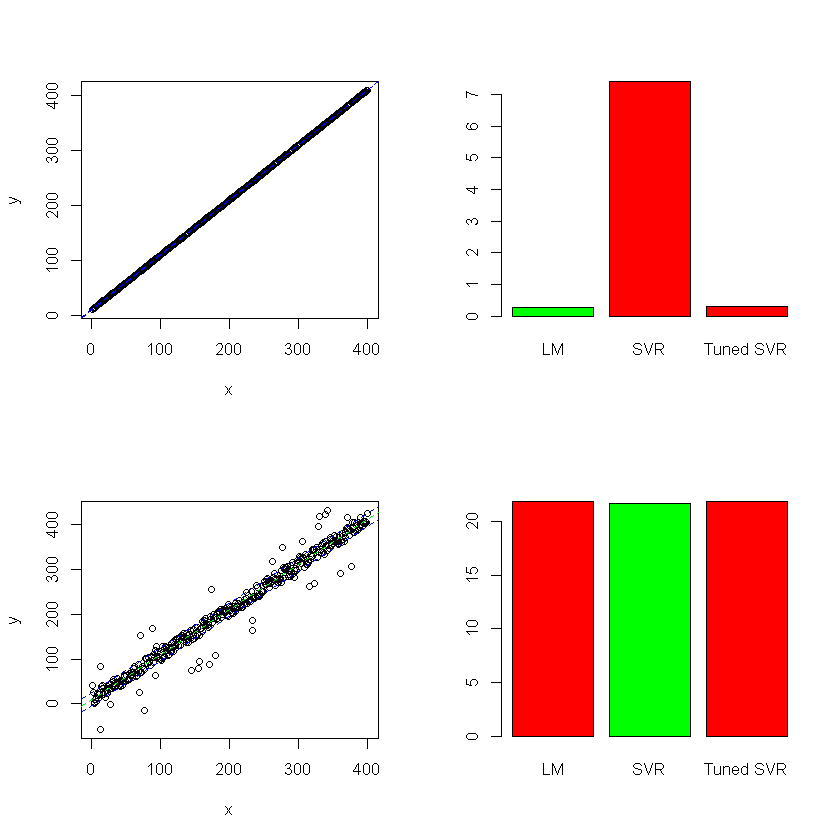

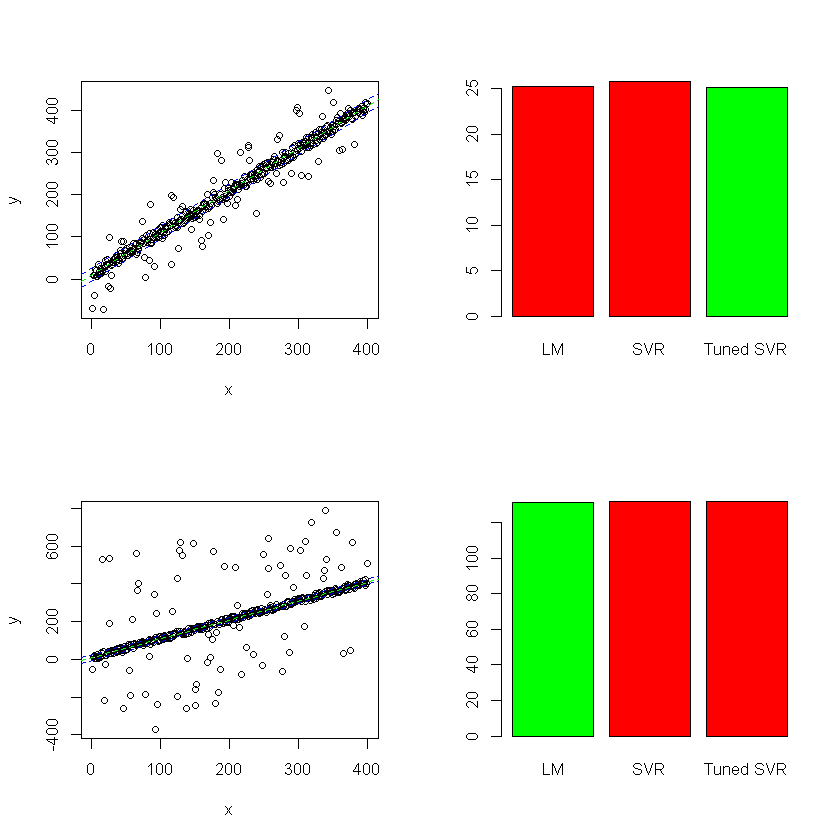

In [294]:
case1 = function(){    
    w=1
    b=10
    noise=15
    y=genData(w,x,b,noise)
    runRegression(y,w,x,b,noise,train)
}

case2 = function(){    
    w=1
    b=10
    noise=50
    y=genData(w,x,b,noise)
    runRegression(y,w,x,b,noise,train)
}

case3 = function(){    
    w=1
    b=10
    noise=0.5
    y=genData(w,x,b,noise)
    runRegression(y,w,x,b,noise,train)
}

case4 = function(){    
    w=1
    b=10
    noise=15
    y=genData(w,x,b,noise)
    
    #Now add some spikes at certain indices 
    indices=sample(1:length(y),length(y)/10)
    y[indices]=y[indices]+ 100*runif(length(indices),min=-1,max=1)
    runRegression(y,w,x,b,noise,train)
}


case5 = function(){    
    w=1
    b=10
    noise=15
    y=genData(w,x,b,noise)
    
    #Now add even more extra spiky obs, every 5th record will be a spike
    indices=sample(1:length(y),length(y)/5)
    y[indices]=y[indices]+ 100*runif(length(indices),min=-1,max=1)
    runRegression(y,w,x,b,noise,train)
}

case6 = function(){    
    w=1
    b=10
    noise=15
    y=genData(w,x,b,noise)
    
    #Now add even more extra spiky obs, every 5th record will be a spike, and the size of the spikes is bigger 
    indices=sample(1:length(y),length(y)/5)
    y[indices]=y[indices]+ 500*runif(length(indices),min=-1,max=1)
    runRegression(y,w,x,b,noise,train)
}

par(mfrow=c(2,2))
case1()
case2()
case3()
case4()
case5()
case6()